In [1]:
import pandas as pd
from datetime import timedelta
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
df = pd.read_excel("frm_ctk_2022.xlsx")

In [3]:
df

,Unnamed: 0,Customer name,Total monetary value,Frequency,Recency
0,0,1066 POOLS LTD,1161.28,5,80
1,1,A D SWIMMING POOLS LTD,23045.54,20,24
2,2,A A Pools,1554.04,5,107
3,3,A2Z POOLS,389.68,2,73
4,4,ABS POOLS LIMITED,1814.88,1,178
...,...,...,...,...,...
268,268,WEST COUNTRY LEISURE POOL DEVON,41916.04,36,29
269,269,WOKINGHAM POOLS AND SPAS LTD,1103.77,2,94
270,270,XL POOLS LTD,843.80,5,22
271,271,YOLO INVESTMENT COMPANY LTD,791.64,4,50


In [4]:
df2 = df[["Customer name", "Total monetary value", "Frequency", "Recency"]].copy()
df2.columns = ["customer", "monetary", "frequency", "recency"]

In [6]:
rfm=df2[['recency','frequency','monetary']]
rfm.index = df2["customer"]
rfm

,recency,frequency,monetary
customer,,,
1066 POOLS LTD,80,5,1161.28
A D SWIMMING POOLS LTD,24,20,23045.54
A A Pools,107,5,1554.04
A2Z POOLS,73,2,389.68
ABS POOLS LIMITED,178,1,1814.88
...,...,...,...
WEST COUNTRY LEISURE POOL DEVON,29,36,41916.04
WOKINGHAM POOLS AND SPAS LTD,94,2,1103.77
XL POOLS LTD,22,5,843.80


# RFM Scoring

In [7]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['score']= rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str)
rfm['score'] = pd.to_numeric(rfm['score'])

In [8]:
pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1], retbins=True)

(customer
 1066 POOLS LTD                     3
 A  D SWIMMING POOLS LTD            4
 A A Pools                          2
 A2Z POOLS                          3
 ABS POOLS LIMITED                  1
                                   ..
 WEST COUNTRY LEISURE POOL DEVON    4
 WOKINGHAM POOLS AND SPAS LTD       2
 XL POOLS LTD                       4
 YOLO INVESTMENT COMPANY LTD        3
 YORKSHIRE HOT TUBS LTD             1
 Name: recency, Length: 273, dtype: category
 Categories (5, int64): [5 < 4 < 3 < 2 < 1],
 array([  1. ,  17. ,  45. ,  91. , 160.4, 347. ]))

In [9]:
pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5], retbins=True)[1]

array([  1. ,  55.4, 109.8, 164.2, 218.6, 273. ])

In [10]:
pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5], retbins=True)[1]

array([  -383.22 ,    333.514,   1162.28 ,   2662.904,  11077.416,
       200733.77 ])

In [11]:
segment_dictionary = {"Champion TOP": [555, 545, 554],
                      "Growing Champion": [544, 454, 455, 445],
                      "Loyal Customer": [543,444,435,355,354,345,344,335],
                      "Potential Loyalist": [553,551,552,541,542,533,532,531,452,451,442,441,431,453,433,432,423,353,352,351,342,341,333,323],
                      "New Customer": [512,511,422,421,412,411,311],
                      "Promising": [525,524,523,522,521,515,514,513,425,424,413,414,415,315,314,313],
                      "Need Attention": [535,534,443,434,343,334,325,324],
                      "Cannot Lose Them": [155,154,144,214,215,115,114,113],
                      "About To Sleep": [331,321,312,221,213],
                      "At Risk": [255,254,245,244,253,252,243,242,235,234,225,224,153,152,145,143,142,135,134,133,125,124],
                      "Hibernating": [332,322,231,241,251,233,232,223,222,132,123,122,212,211],
                      "Lost": [111,112,121,131,141,151]
                      }

def rfm_segment(score):
    for k, v in segment_dictionary.items():
        if score in v:
            return k


In [12]:
rfm['segment'] = rfm['score'].apply(lambda score : rfm_segment(score))
rfm['cluster'] = 3
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,segment,cluster
customer,,,,,,,,,
1066 POOLS LTD,80,5,1161.28,3,3,2,332,Hibernating,3
A D SWIMMING POOLS LTD,24,20,23045.54,4,5,5,455,Growing Champion,3
A A Pools,107,5,1554.04,2,3,3,233,Hibernating,3
A2Z POOLS,73,2,389.68,3,2,2,322,Hibernating,3
ABS POOLS LIMITED,178,1,1814.88,1,1,3,113,Cannot Lose Them,3


<Figure size 20000x20000 with 0 Axes>

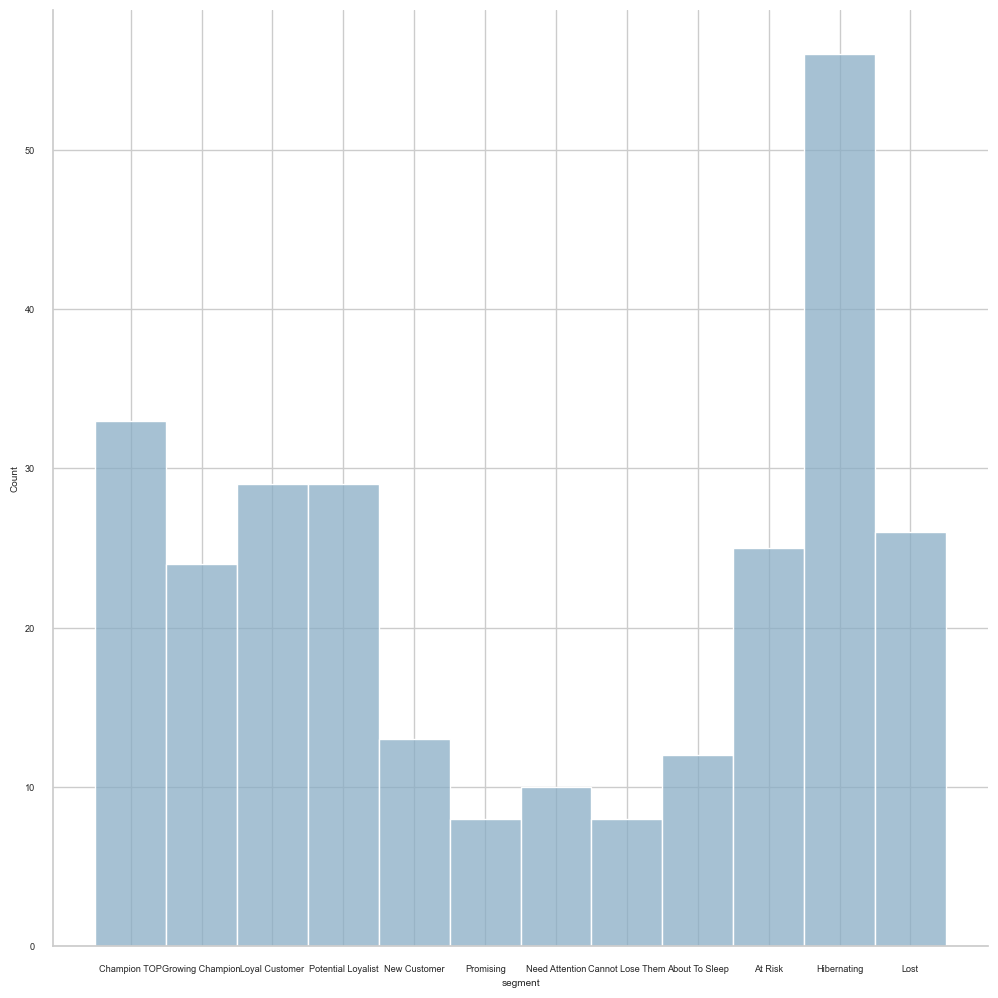

In [13]:
rfm['segment'] = pd.Categorical(rfm['segment'], categories=segment_dictionary.keys())

plt.figure(figsize=(200,200))
sns.set_context("notebook", font_scale=0.6)
sns.set_palette('twilight')
sns.displot(rfm['segment'], height=10)

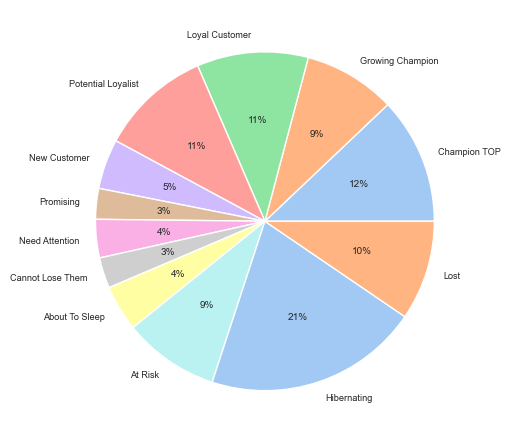

In [14]:
colors = sns.color_palette("pastel", n_colors=12)
plt.pie(rfm.groupby('segment').size(),labels=rfm.groupby('segment').size().index, colors = colors, autopct='%.0f%%')
plt.show()

In [15]:
rfm.groupby('segment').agg({
    'recency' : ['mean', 'min','max'],
    'frequency' : ['mean', 'min','max'],
    'monetary' : ['mean','min','max','count']
})

recency            frequency               monetary  \
                          mean  min  max       mean min  max          mean   
segment                                                                      
Champion TOP          8.363636    1   17  57.515152   7  296  40712.965152   
Growing Champion     20.541667    4   44  27.666667   8   64  17704.140833   
Loyal Customer       47.137931    9   88  21.827586   7   71   9615.538621   
Potential Loyalist   44.448276    2   91   4.620690   1   12   1389.351379   
New Customer         41.000000   21   80   1.384615   1    3    276.311538   
Promising            18.750000    2   85   1.875000   1    3   1405.991250   
Need Attention       39.500000    4   91   7.300000   3   12   3994.550000   
Cannot Lose Them    232.875000  164  347   5.125000   1   25   5033.315000   
About To Sleep      105.333333   51  158   1.750000   1    3    381.071667   
At Risk             157.680000  106  270   8.120000   2   33   8412.871600   
Hibernating         129.946429   49  283   2.678571   1    6    830.369286   
Lost                250.346154  162  347   1.346154   1    5    165.140385   

                                              
                        min        max count  
segment                                       
Champion TOP        7604.59  200733.77    33  
Growing Champion    2869.28   67860.99    24  
Loyal Customer      1258.57   48871.70    29  
Potential Loyalist   269.86    2629.73    29  
New Customer          11.81     864.18    13  
Promising            156.77    3354.94     8  
Need Attention      1253.84   10002.39    10  
Cannot Lose Them    1266.17   25292.31     8  
About To Sleep        40.38    1830.66    12  
At Risk              714.38   44408.13    25  
Hibernating         -383.22    2321.02    56  
Lost                -261.69     557.21    26

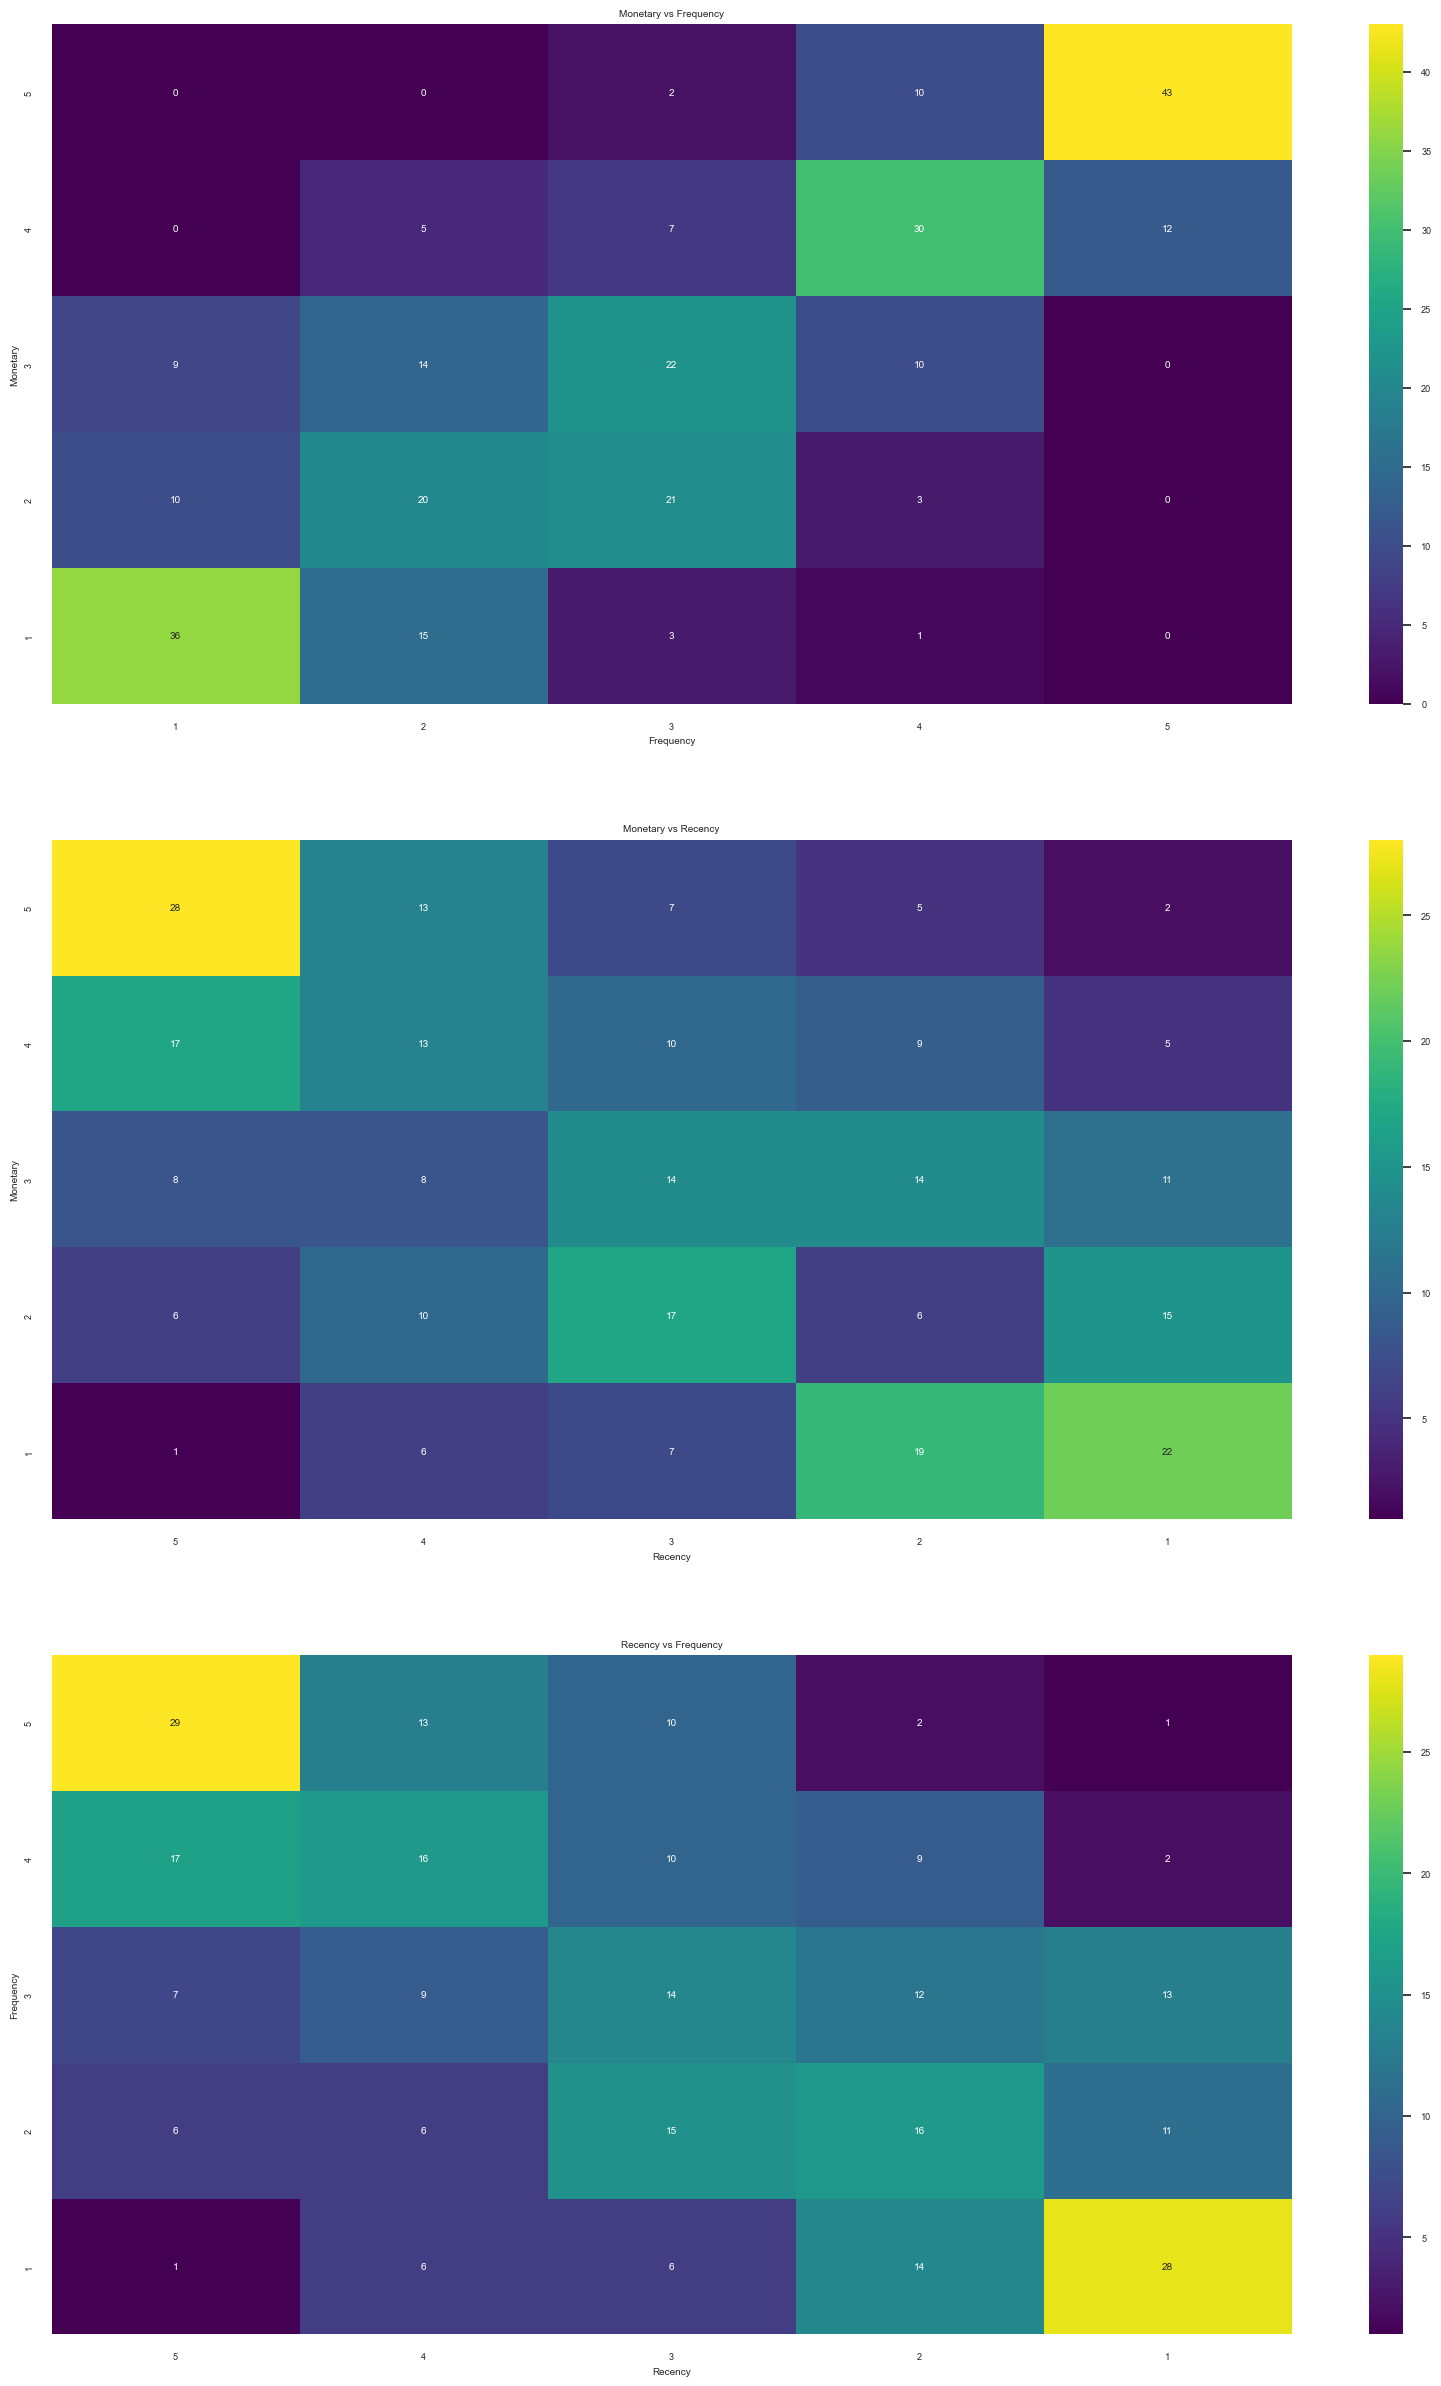

In [16]:
cross_table1 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['frequency_score'])
cross_table2 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['recency_score'])
cross_table3 = pd.crosstab(index=rfm['frequency_score'], columns=rfm['recency_score'])
plt.figure(figsize=(20,30))
plt.subplot(311)
ax1 = sns.heatmap(cross_table1, cmap='viridis', annot=True, fmt=".0f")
ax1.invert_yaxis()
ax1.set_ylabel('Monetary')
ax1.set_xlabel('Frequency')
ax1.set_title('Monetary vs Frequency')
plt.subplot(312)
ax2 = sns.heatmap(cross_table2, cmap='viridis', annot=True, fmt=".0f")
ax2.invert_yaxis()
ax2.set_ylabel('Monetary')
ax2.set_xlabel('Recency')
ax2.set_title('Monetary vs Recency')
plt.subplot(313)
ax3 = sns.heatmap(cross_table3, cmap='viridis', annot=True, fmt=".0f")
ax3.invert_yaxis()
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Recency')
ax3.set_title('Recency vs Frequency')
plt.show()

# K Means

## Outliers


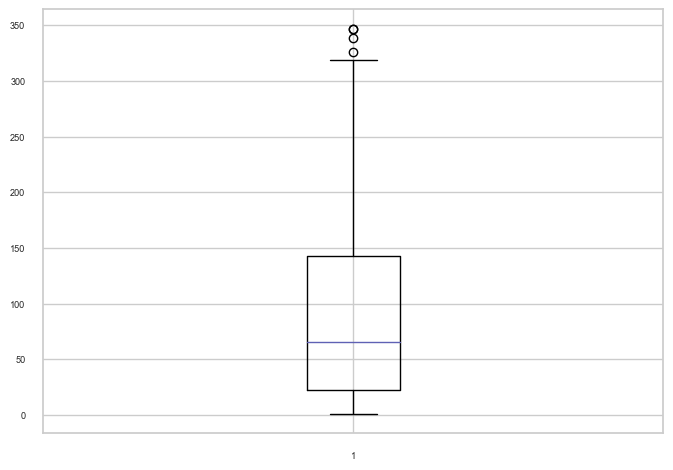

In [17]:
rfm1 = rfm
plt.boxplot(rfm1.recency)
Q1 = rfm1.recency.quantile(0.25)
Q3 = rfm1.recency.quantile(0.75)
IQR = Q3 - Q1
rfm1 = rfm1[(rfm1.recency >= Q1 - 3*IQR) & (rfm1.recency <= Q3 + 3*IQR)]

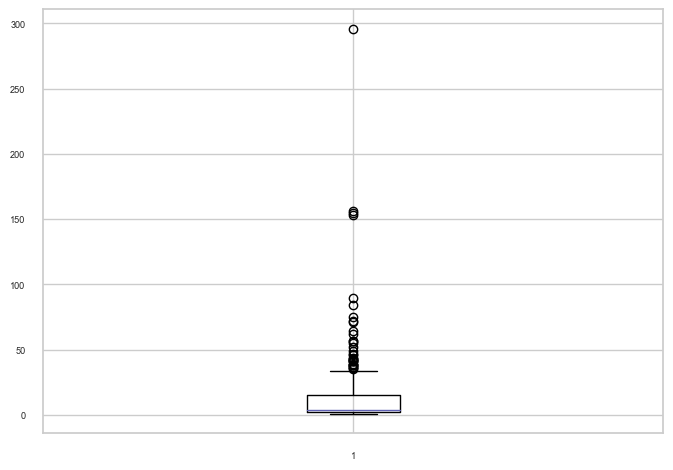

In [18]:
plt.boxplot(rfm1.frequency)
Q1 = rfm1.frequency.quantile(0.25)
Q3 = rfm1.frequency.quantile(0.75)
IQR = Q3 - Q1
rfm1 = rfm1[(rfm1.frequency >= Q1 - 3*IQR) & (rfm1.frequency <= Q3 + 3*IQR)]


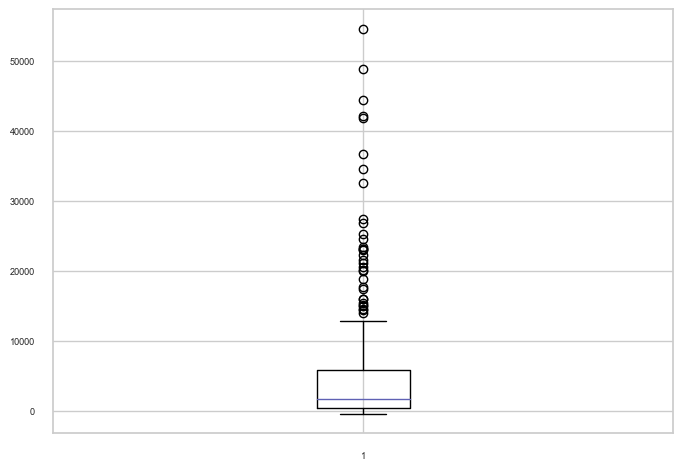

In [19]:
plt.boxplot(rfm1.monetary)
Q1 = rfm1.monetary.quantile(0.25)
Q3 = rfm1.monetary.quantile(0.75)
IQR = Q3 - Q1
rfm1 = rfm1[(rfm1.monetary >= (Q1 - 3*IQR)) & (rfm1.monetary <= (Q3 + 3*IQR))]

In [20]:
rfm2=rfm1[['recency','frequency','monetary']]

In [21]:
scaler = StandardScaler()
x_scaled=scaler.fit(rfm2)
x_scaled=scaler.fit_transform(rfm2)

## Clusters
We will use the elbow method to determine the optimal amount of clusters. If we pick more clusters than necessary the added clusters will not be more descriptive of the data and will increase the amount of distortion. Some clusters will also be very small.

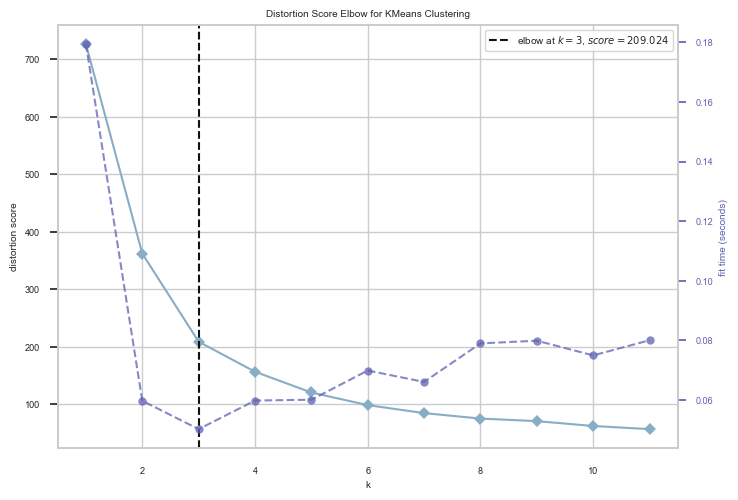

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x_scaled)
visualizer.show()

In [23]:
kmeans_scaled = KMeans(3)
kmeans_scaled.fit(x_scaled)
identified_clusters = kmeans_scaled.fit_predict(rfm2)
clusters_scaled = rfm2.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

In [24]:
rfm2['cluster']= clusters_scaled['cluster_pred']
rfm2['segment']= rfm1['segment']

C:\Users\juanv\AppData\Local\Temp\ipykernel_5756\2804094801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2['cluster']= clusters_scaled['cluster_pred']
C:\Users\juanv\AppData\Local\Temp\ipykernel_5756\2804094801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2['segment']= rfm1['segment']


In [25]:
rfm2 = pd.concat([rfm2,rfm[["recency", "frequency", "monetary", "cluster", "segment"]]]).reset_index().drop_duplicates(subset='customer', keep='first').set_index('customer')
rfm2[["recency_score", "frequency_score", "monetary_score", "score"]] = rfm[["recency_score", "frequency_score", "monetary_score", "score"]]

[0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 2 0 0 0 2 0 2 2 0 0 1 1 2 0 0 0 0 0 0 0 0 0
 0 2 0 1 0 2 2 0 2 0 0 0 0 0 2 1 0 1 1 0 1 0 2 2 0 0 2 2 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 2 1 0 1 0 0 2 0 0 0 0 0 2 2 0 0 2 2
 1 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 1 0 2 0 0 0 2 0 2 0 0 0 1
 0 2 0 0 0 0 0 0 0 0 1 0 0 2 1 2 2 0 0 0 0 0 0 1 0 2 1 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 2 0 2 0 2 0 0 0 0 2 2 1 1 0 0 0 0 2 0 0 0 2 0 0 0 0 1 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 Our cluster centers are as follows
[[ 1.16538646 -0.54945818 -0.48518338]
 [-0.72453259  1.89544517  1.91747159]
 [-0.57058588 -0.23597777 -0.28759309]]


,recency,frequency,monetary,segment,recency_score,frequency_score,monetary_score,score
cluster,,,,,,,,
0,83,83,83,83,83,83,83,83
1,39,39,39,39,39,39,39,39
2,120,120,120,120,120,120,120,120
3,31,31,31,31,31,31,31,31


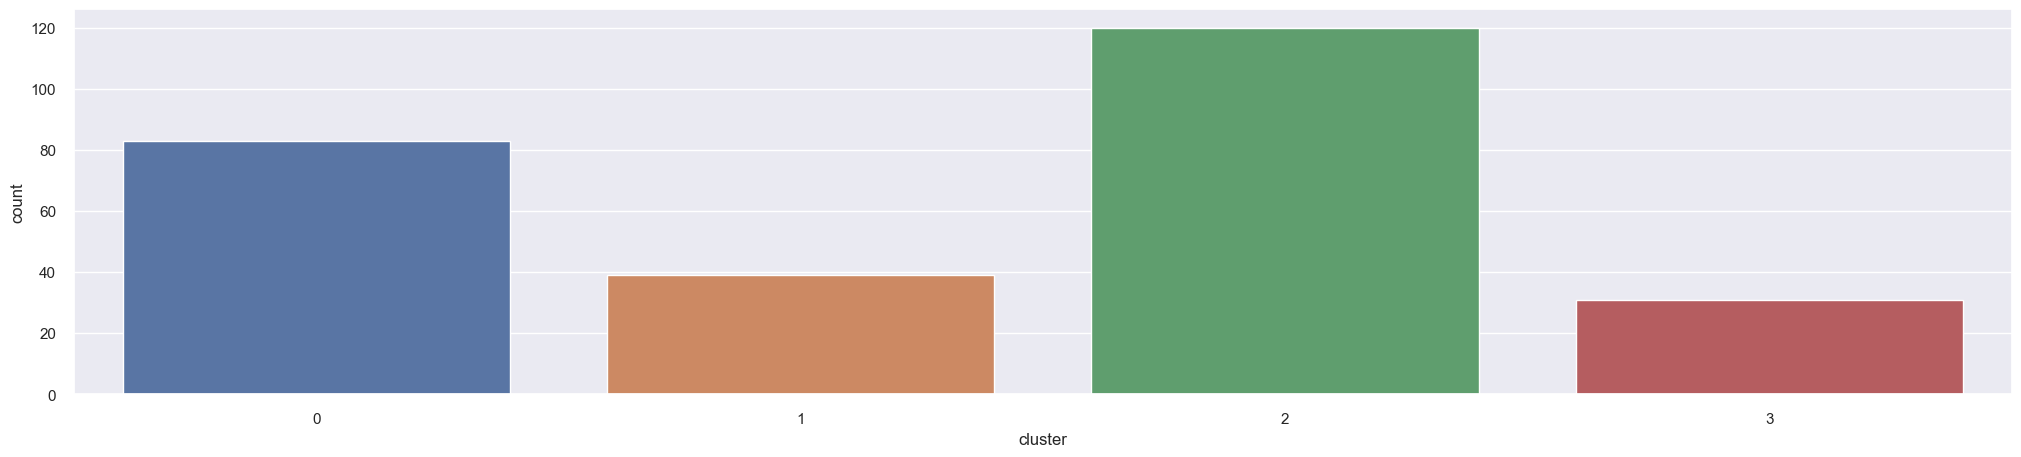

In [26]:
print(identified_clusters)
sns.set(style="darkgrid")
print(" Our cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster", data=rfm2)
rfm2.groupby(['cluster']).count()

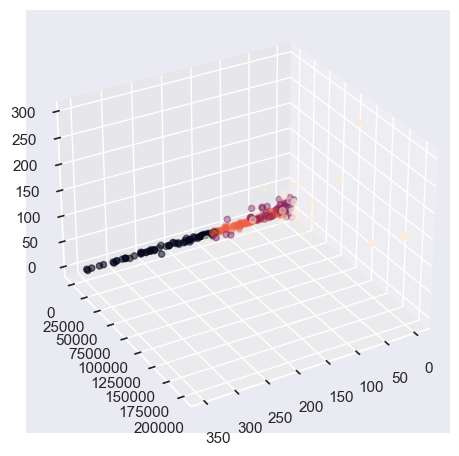

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=rfm2['recency']
yline=rfm2['frequency']
zline=rfm2['monetary']

ax.scatter3D(xline, zline,yline,c=rfm2['cluster'])
ax.view_init(30, 60)

# Data Description

In [28]:
segment_df = rfm2.groupby('segment').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})
segment_df

recency            frequency               monetary  \
                          mean  min  max       mean min  max          mean   
segment                                                                      
Champion TOP          8.363636    1   17  57.515152   7  296  40712.965152   
Growing Champion     20.541667    4   44  27.666667   8   64  17704.140833   
Loyal Customer       47.137931    9   88  21.827586   7   71   9615.538621   
Potential Loyalist   44.448276    2   91   4.620690   1   12   1389.351379   
New Customer         41.000000   21   80   1.384615   1    3    276.311538   
Promising            18.750000    2   85   1.875000   1    3   1405.991250   
Need Attention       39.500000    4   91   7.300000   3   12   3994.550000   
Cannot Lose Them    232.875000  164  347   5.125000   1   25   5033.315000   
About To Sleep      105.333333   51  158   1.750000   1    3    381.071667   
At Risk             157.680000  106  270   8.120000   2   33   8412.871600   
Hibernating         129.946429   49  283   2.678571   1    6    830.369286   
Lost                250.346154  162  347   1.346154   1    5    165.140385   

                                              
                        min        max count  
segment                                       
Champion TOP        7604.59  200733.77    33  
Growing Champion    2869.28   67860.99    24  
Loyal Customer      1258.57   48871.70    29  
Potential Loyalist   269.86    2629.73    29  
New Customer          11.81     864.18    13  
Promising            156.77    3354.94     8  
Need Attention      1253.84   10002.39    10  
Cannot Lose Them    1266.17   25292.31     8  
About To Sleep        40.38    1830.66    12  
At Risk              714.38   44408.13    25  
Hibernating         -383.22    2321.02    56  
Lost                -261.69     557.21    26

In [29]:
subgroup_df = rfm2.groupby(['cluster','segment']).agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})
subgroup_df

recency                frequency               \
                                  mean    min    max       mean   min    max   
cluster segment                                                                
0       Champion TOP               NaN    NaN    NaN        NaN   NaN    NaN   
        Growing Champion           NaN    NaN    NaN        NaN   NaN    NaN   
        Loyal Customer             NaN    NaN    NaN        NaN   NaN    NaN   
        Potential Loyalist         NaN    NaN    NaN        NaN   NaN    NaN   
        New Customer               NaN    NaN    NaN        NaN   NaN    NaN   
        Promising                  NaN    NaN    NaN        NaN   NaN    NaN   
        Need Attention             NaN    NaN    NaN        NaN   NaN    NaN   
        Cannot Lose Them    242.714286  178.0  347.0   2.285714   1.0   10.0   
        About To Sleep      139.000000  126.0  158.0   1.833333   1.0    3.0   
        At Risk             193.384615  133.0  270.0   4.461538   2.0    8.0   
        Hibernating         166.258065  122.0  283.0   2.387097   1.0    6.0   
        Lost                250.346154  162.0  347.0   1.346154   1.0    5.0   
1       Champion TOP          8.312500    2.0   17.0  29.000000   7.0   44.0   
        Growing Champion     28.571429   18.0   44.0  28.571429  15.0   49.0   
        Loyal Customer       57.083333   40.0   77.0  26.750000  14.0   42.0   
        Potential Loyalist         NaN    NaN    NaN        NaN   NaN    NaN   
        New Customer               NaN    NaN    NaN        NaN   NaN    NaN   
        Promising                  NaN    NaN    NaN        NaN   NaN    NaN   
        Need Attention             NaN    NaN    NaN        NaN   NaN    NaN   
        Cannot Lose Them           NaN    NaN    NaN        NaN   NaN    NaN   
        About To Sleep             NaN    NaN    NaN        NaN   NaN    NaN   
        At Risk             121.000000  108.0  143.0  14.500000   7.0   26.0   
        Hibernating                NaN    NaN    NaN        NaN   NaN    NaN   
        Lost                       NaN    NaN    NaN        NaN   NaN    NaN   
2       Champion TOP               NaN    NaN    NaN        NaN   NaN    NaN   
        Growing Champion     10.666667    4.0   17.0  12.777778   8.0   15.0   
        Loyal Customer       35.571429    9.0   88.0  11.714286   7.0   16.0   
        Potential Loyalist   44.448276    2.0   91.0   4.620690   1.0   12.0   
        New Customer         41.000000   21.0   80.0   1.384615   1.0    3.0   
        Promising            18.750000    2.0   85.0   1.875000   1.0    3.0   
        Need Attention       39.500000    4.0   91.0   7.300000   3.0   12.0   
        Cannot Lose Them           NaN    NaN    NaN        NaN   NaN    NaN   
        About To Sleep       71.666667   51.0  107.0   1.666667   1.0    2.0   
        At Risk             116.500000  106.0  134.0   8.500000   5.0   12.0   
        Hibernating          84.920000   49.0  128.0   3.040000   1.0    6.0   
        Lost                       NaN    NaN    NaN        NaN   NaN    NaN   
3       Champion TOP          8.411765    1.0   17.0  84.352941  16.0  296.0   
        Growing Champion     24.625000   18.0   32.0  43.625000  20.0   64.0   
        Loyal Customer       61.333333   46.0   81.0  49.333333  34.0   71.0   
        Potential Loyalist         NaN    NaN    NaN        NaN   NaN    NaN   
        New Customer               NaN    NaN    NaN        NaN   NaN    NaN   
        Promising                  NaN    NaN    NaN        NaN   NaN    NaN   
        Need Attention             NaN    NaN    NaN        NaN   NaN    NaN   
        Cannot Lose Them    164.000000  164.0  164.0  25.000000  25.0   25.0   
        About To Sleep             NaN    NaN    NaN        NaN   NaN    NaN   
        At Risk             122.500000  109.0  136.0  18.000000   3.0   33.0   
        Hibernating                NaN    NaN    NaN        NaN   NaN    NaN   
        Lost                   

In [30]:
df5 = rfm2.groupby('cluster').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})
df5

recency            frequency               monetary           \
               mean  min  max       mean min  max          mean      min   
cluster                                                                    
0        201.325301  122  347   2.337349   1   10   1170.327590  -261.69   
1         38.512821    2  143  26.743590   7   49  12854.480256  4675.33   
2         51.775000    2  134   5.466667   1   16   2131.212583  -383.22   
3         30.096774    1  164  64.258065   3  296  51422.664194  7147.73   

                          
               max count  
cluster                   
0         12799.40    83  
1         21554.20    39  
2         10002.39   120  
3        200733.77    31

In [31]:
score_df = rfm2.groupby('score').agg({
    'recency' : ['mean','min','max'],
    'frequency' : ['mean','min','max'],
    'monetary' : ['mean','min','max','count']
})
score_df

recency            frequency               monetary            \
             mean  min  max       mean min  max          mean       min   
score                                                                     
111    255.277778  172  347   1.000000   1    1     88.770556   -261.69   
112    252.500000  162  303   1.000000   1    1    493.032500    422.22   
113    253.333333  178  347   1.000000   1    1   1936.563333   1266.17   
121    270.000000  253  287   2.000000   1    3    115.695000     31.71   
122    218.500000  171  283   2.000000   1    3    709.023333    338.18   
...           ...  ...  ...        ...  ..  ...           ...       ...   
543     12.666667    9   17  10.000000   8   13   1637.046667   1258.57   
544     10.666667    4   17  12.777778   8   15   4701.360000   2869.28   
545     10.250000    8   14  13.750000   7   18  18458.212500  12751.23   
554      8.600000    3   17  29.600000  24   32   9392.856000   7604.59   
555      8.000000    1   17  70.625000  23  296  50947.113333  11817.67   

                        
             max count  
score                   
111       331.55    18  
112       557.21     4  
113      2259.76     6  
121       199.68     2  
122       956.35     6  
...          ...   ...  
543      2012.17     3  
544      7697.86     9  
545     24531.78     4  
554     10866.69     5  
555    200733.77    24  

[75 rows x 10 columns]

In [33]:
rfm2.to_excel("ctk-2022/database-ctk-2022.xlsx")
df5.to_excel("ctk-2022/cluster-explanation-ctk-2022.xlsx")
subgroup_df.to_excel("ctk-2022/clusternsegment-explanation-ctk-2022.xlsx")
segment_df.to_excel("ctk-2022/segment-explanation-ctk-2022.xlsx")
score_df.to_excel("ctk-2022/score-explanation-ctk-2022.xlsx")

